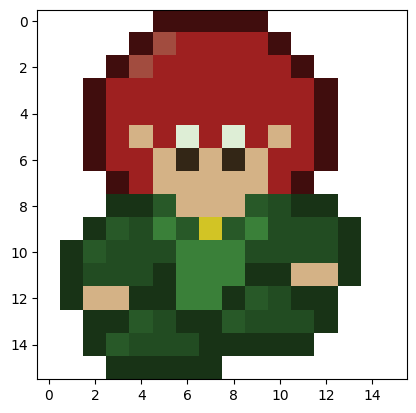

In [1]:
from minigrid.renderers.pretty_obj_renderers import extract_sprite_by_index
import numpy as np
import matplotlib.pyplot as plt


# display extracted sprite. sprite will be returned as a numpy array

def display_sprite(index):
    sprite = extract_sprite_by_index("figures/sprites/Players.png", 16, 16, index)
    plt.imshow(sprite)
    plt.show()


display_sprite(112)


In [ ]:
import gymnasium as gym
from minigrid.envs import FourRoomsEnv, LavaGapEnv, LockedRoomEnv
import time
from minigrid.rendering.rendering_manager import PrettyRenderingManager, RenderingManager
import numpy as np

env = LockedRoomEnv(render_mode='human', rendering_manager=PrettyRenderingManager)

observation, info = env.reset()
for _ in range(250):

    rand = np.random.rand()
    action = 2

    if rand < 0.3:
        action = env.action_space.sample()

    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

    # pause for a few milliseconds before rendering the next frame
    time.sleep(0.5)
    
env.close()